In [46]:
import time
import torch
import random
import numpy as np
import pandas as pd
import torch.nn as nn
import torch.optim as optim
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from torchvision import transforms
import torchvision
from torch.utils.data import  DataLoader,datasets,Subset
from torchvision import transforms,datasets
from PIL import Image
import torchvision.models as models

In [71]:
test_triplets = pd.read_csv('./task4_be9ai3nsdj/test_triplets.txt',delimiter="\t",header=None)
test_triplets= test_triplets[0].str.split(" ", n = 3, expand = True) 
train_triplets = pd.read_csv('./task4_be9ai3nsdj/train_triplets.txt',delimiter="\t",header=None)
train_triplets.head()
train_triplets_split= train_triplets[0].str.split(" ", n = 3, expand = True) 

In [90]:
all_files = np.unique(train_triplets_split)

In [54]:
def load_triplets(triplet,i):
    anchor_file = triplet[0][i]
    truthy_file = triplet[1][i]
    falsy_file = triplet[2][i]
    input_image_file = './task4_be9ai3nsdj/food/food/'
    preprocess = transforms.Compose([
        transforms.Resize(299),
        transforms.CenterCrop(299),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    anchor = preprocess(Image.open(input_image_file+anchor_file+'.jpg'))
    plt.imshow(anchor.permute(1,2,0))
    plt.show()
    truthy = preprocess(Image.open(input_image_file+truthy_file+'.jpg'))
    plt.imshow(truthy.permute(1,2,0))
    plt.show()
    falsy = preprocess(Image.open(input_image_file+falsy_file+'.jpg'))
    plt.imshow(falsy.permute(1,2,0))
    plt.show()
            

    stack = [anchor,truthy,falsy]
    
    return torch.stack(
    (anchor,truthy,falsy)
    ,dim=1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


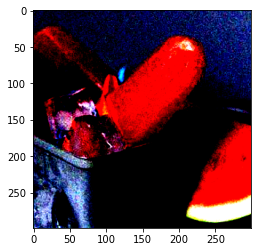

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


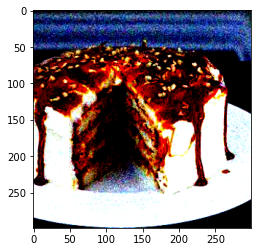

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


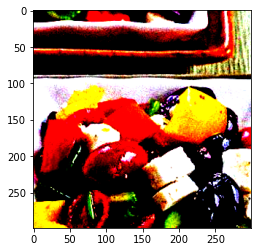

In [55]:
test = load_triplets(train_triplets_split,0)

In [124]:
class TripletLoss(nn.Module):
    def __init__(self, margin = 1.0):
        super(TripletLoss, self).__init__()
        self.margin = margin

    def calc_euclidean(self, x1, x2):
        return(x1 - x2).pow(2).sum(1)

    def forward(self, anchor: torch.Tensor, positive: torch.Tensor, negative: torch.Tensor) -> torch.Tensor:
        distance_positive = self.calc_euclidean(anchor, positive)
        distance_negative_a = self.calc_euclidean(anchor, negative)
        distance_negative_b = self.calc_euclidean(positive, negative)

        losses = torch.relu(distance_positive - (distance_negative_a + distance_negative_b)/2.0 + self.margin)

        return losses.mean()

In [125]:
class EmbeddingNetwork(nn.Module):
    def __init__(self, emb_dim = 128, is_pretrained=True, freeze_params=True):
        super(EmbeddingNetwork, self).__init__()

        self.backbone = models.resnet18(pretrained=is_pretrained)
        set_parameter_requires_grad(self.backbone, freeze_params)

        # replace the last classification layer with an embedding layer.
        num_ftrs = self.backbone.fc.in_features
        self.backbone.fc = nn.Linear(num_ftrs, emb_dim)

        # make that layer trainable
        for param in self.backbone.fc.parameters():
            param.requires_grad = True

        self.inputsize = T_G_WIDTH

    def forward(self, x):

        x = self.backbone(x)
        x = F.normalize(x, p=2.0, dim=1)

        return x
class TripletFolder(ImageFolder):
    def __init__(self, root: str, transform: Optional[Callable] = None):
        super(TripletFolder, self).__init__(root=root, transform=transform)

        # Create a dictionary of lists for each class for reverse lookup
        # to generate triplets 
        self.classdict = {}
        for c in self.classes:
            ci = self.class_to_idx[c]
            self.classdict[ci] = []

        # append each file in the approach dictionary element list
        for s in self.samples:
            self.classdict[s[1]].append(s[0])

        # keep track of the sizes for random sampling
        self.classdictsize = {}
        for c in self.classes:
            ci = self.class_to_idx[c]
            self.classdictsize[ci] = len(self.classdict[ci])

In [65]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

NameError: name 'trainloader' is not defined

In [120]:
import os 
from torch.utils.data import Dataset, DataLoader
class imageDataset(Dataset):
    """Face Landmarks dataset."""

    def __init__(self, csv_file, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.landmarks_frame = csv_file
        self.root_dir = './task4_be9ai3nsdj/food/food/'
        self.transform = transform

    def __len__(self):
        return len(self.landmarks_frame)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir,
                                self.landmarks_frame[idx]+'.jpg',)
        print(img_name)
        
        image = Image.open(img_name)

        sample = {'image': image, 'fname': all_files[idx]}

        if self.transform:
            sample = self.transform(sample)

        return sample
    
    
#     def load_triplets(triplet,i):
#     anchor_file = triplet[0][i]
#     truthy_file = triplet[1][i]
#     falsy_file = triplet[2][i]
#     input_image_file = './task4_be9ai3nsdj/food/food/'
#     preprocess = transforms.Compose([
#         transforms.Resize(299),
#         transforms.CenterCrop(299),
#         transforms.ToTensor(),
#         transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
#     ])
#     anchor = preprocess(Image.open(input_image_file+anchor_file+'.jpg'))
#     plt.imshow(anchor.permute(1,2,0))
#     plt.show()
#     truthy = preprocess(Image.open(input_image_file+truthy_file+'.jpg'))
#     plt.imshow(truthy.permute(1,2,0))
#     plt.show()
#     falsy = preprocess(Image.open(input_image_file+falsy_file+'.jpg'))
#     plt.imshow(falsy.permute(1,2,0))
#     plt.show()
            

#     stack = [anchor,truthy,falsy]
    
#     return torch.stack(
#     (anchor,truthy,falsy)
#     ,dim=1)

In [122]:
preprocess = transforms.Compose([
    transforms.Resize(299),
    transforms.CenterCrop(299),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
test = imageDataset(csv_file=all_files,transform=preprocess)


In [123]:
test[0]

./task4_be9ai3nsdj/food/food/00000.jpg


TypeError: img should be PIL Image. Got <class 'dict'>

In [110]:
import skimage.io

ModuleNotFoundError: No module named 'skimage'